In [3]:
import pandas as pd
import numpy as np

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
matches=pd.read_csv('matches_cleaned.csv')
deliveries=pd.read_csv('deliveries.csv')

In [ ]:
matches.sample(5)

In [47]:
from pandas_profiling import ProfileReport

/var/folders/ct/586vcml54jgf9dlg8gh73lq40000gn/T/ipykernel_29782/2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
ProfileReport(matches, title='IPL Matches Report', explorative=True).to_file("matches_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
ProfileReport(deliveries, title='IPL Deliveries Report', explorative=True).to_file("deliveries_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# data cleaning for matches

In [ ]:
matches.drop(['id'],axis=1,inplace=True)

In [ ]:
matches_per_season=matches.season.value_counts()

- this is filling the city name from venue 

In [ ]:
matches['city'].fillna(matches[matches['city'].isna()]['venue'].apply(lambda x: x.split()[0]),inplace=True)

In [ ]:
matches.drop(columns=['method'],inplace=True)

In [ ]:
matches.drop(columns=['super_over'],inplace=True)


In [ ]:
matches.isna().sum()

season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
umpire1            0
umpire2            0
dtype: int64

In [ ]:
matches['player_of_match'].fillna('No player',inplace=True)

In [ ]:
matches['winner'].fillna('No winner',inplace=True) 

/var/folders/ct/586vcml54jgf9dlg8gh73lq40000gn/T/ipykernel_90542/3169814262.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['winner'].fillna('No winner',inplace=True)


In [ ]:
matches['target_runs'].fillna(0,inplace=True)
matches['target_overs'].fillna(0,inplace=True)

/var/folders/ct/586vcml54jgf9dlg8gh73lq40000gn/T/ipykernel_90542/3114644442.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['target_runs'].fillna(0,inplace=True)
/var/folders/ct/586vcml54jgf9dlg8gh73lq40000gn/T/ipykernel_90542/3114644442.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [ ]:
matches['result_margin'].fillna(-1,inplace=True)

/var/folders/ct/586vcml54jgf9dlg8gh73lq40000gn/T/ipykernel_90542/3944942953.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['result_margin'].fillna(-1,inplace=True)


In [ ]:
matches.to_csv('matches.csv',index=False)

# Data Cleaning for Deliveries 

In [ ]:
deliveries.isna().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

In [ ]:
deliveries.sample(5)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,is_wicket,player_dismissed,dismissal_kind,fielder
196010,1254067,2,Kolkata Knight Riders,Royal Challengers Bangalore,11,2,EJG Morgan,HV Patel,Shakib Al Hasan,0,0,0,0,NaN,NaN,NaN
154053,1136576,1,Kings XI Punjab,Sunrisers Hyderabad,12,2,KK Nair,CJ Jordan,CH Gayle,1,0,1,0,NaN,NaN,NaN
165894,1175360,2,Chennai Super Kings,Delhi Capitals,11,1,MS Dhoni,KMA Paul,KM Jadhav,0,0,0,0,NaN,NaN,NaN
165119,1175357,2,Kolkata Knight Riders,Sunrisers Hyderabad,6,1,N Rana,S Kaul,RV Uthappa,0,0,0,0,NaN,NaN,NaN
74639,548374,2,Delhi Daredevils,Kings XI Punjab,15,2,DPMD Jayawardene,P Awana,Y Venugopal Rao,0,0,0,0,NaN,NaN,NaN


In [ ]:
deliveries.drop(columns=['extras_type'],inplace=True)

In [ ]:
deliveries['player_dismissed'].fillna('No dismissal',inplace=True)
deliveries['dismissal_kind'].fillna('No dismissal',inplace=True)
deliveries['fielder'].fillna('No fielder',inplace=True)

/var/folders/ct/586vcml54jgf9dlg8gh73lq40000gn/T/ipykernel_8775/2626853015.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  deliveries['dismissal_kind'].fillna('No dismissal',inplace=True)


In [ ]:
deliveries[~deliveries['fielder'].isna()]

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,is_wicket,player_dismissed,dismissal_kind,fielder
33,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,5,2,SC Ganguly,Z Khan,BB McCullum,0,0,0,1,SC Ganguly,caught,JH Kallis
74,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,12,1,RT Ponting,JH Kallis,BB McCullum,0,0,0,1,RT Ponting,caught,P Kumar
106,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,17,1,DJ Hussey,AA Noffke,BB McCullum,0,0,0,1,DJ Hussey,caught,CL White
154,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,4,5,JH Kallis,AB Agarkar,W Jaffer,0,0,0,1,JH Kallis,caught,M Kartik
157,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,5,2,W Jaffer,AB Dinda,CL White,0,0,0,1,W Jaffer,caught,RT Ponting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260802,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,10,2,AK Markram,AD Russell,H Klaasen,0,0,0,1,AK Markram,caught,MA Starc
260811,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,11,5,Shahbaz Ahmed,CV Varun,H Klaasen,0,0,0,1,Shahbaz Ahmed,caught,SP Narine
260817,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,12,5,Abdul Samad,AD Russell,H Klaasen,0,0,0,1,Abdul Samad,caught,Rahmanullah Gurbaz
260852,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,3,PJ Cummins,AD Russell,B Kumar,0,0,0,1,PJ Cummins,caught,MA Starc


In [ ]:
deliveries.to_csv('deliveries.csv',index=False)

# Encoding of Data

In [12]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
matches['match_type'].value_counts()

match_type
League        1029
Qualifier       28
Eliminator      21
Final           17
Name: count, dtype: int64

In [ ]:
matches.loc[matches['match_type'] == 'Qualifier 1', 'match_type'] = 'Qualifier'
matches.loc[matches['match_type'] == 'Qualifier 2', 'match_type'] = 'Qualifier'

In [ ]:
matches.loc[matches['match_type'] == 'Elimination Final', 'match_type'] = 'Eliminator'

In [ ]:
matches.loc[matches['match_type']=='Semi Final', 'match_type']='Eliminator'
matches.loc[matches['match_type']=='3rd Place Play-Off', 'match_type']='Eliminator'

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [ ]:
matches.drop(columns=['city'],inplace=True)

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
from sklearn.preprocessing import KBinsDiscretizer


In [32]:
toss_decision_encoder=LabelEncoder()
result_encoder=LabelEncoder()
team_encoder=OneHotEncoder(sparse_output=False,drop='first')
target_runs_encoder=LabelEncoder()
target_overs_encoder=LabelEncoder()
match_type_encoder=OrdinalEncoder(categories=[['League','Eliminator','Quilifier','Final']],unknown_value='ignore')
venue_encoder=OneHotEncoder(sparse_output=False,drop='first')
umpire_encoder=LabelEncoder()
result_binning=KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='kmeans')
bins = [0, 1000, 3000, 5000]  
run_bins = KBinsDiscretizer(n_bins=len(bins) - 1, encode='ordinal', strategy='uniform')
bins=[0,10,20,30]
batting_avg_bins=KBinsDiscretizer(n_bins=len(bins) - 1, encode='ordinal', strategy='uniform')
bowling_avg_bins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
bins=[0,30,60,100,150]
wickets_bins=KBinsDiscretizer(n_bins=len(bins) - 1, encode='ordinal', strategy='uniform')



In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(matches['runs'],bins=10)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(matches['batting_avg'],bins=10)
plt.show()

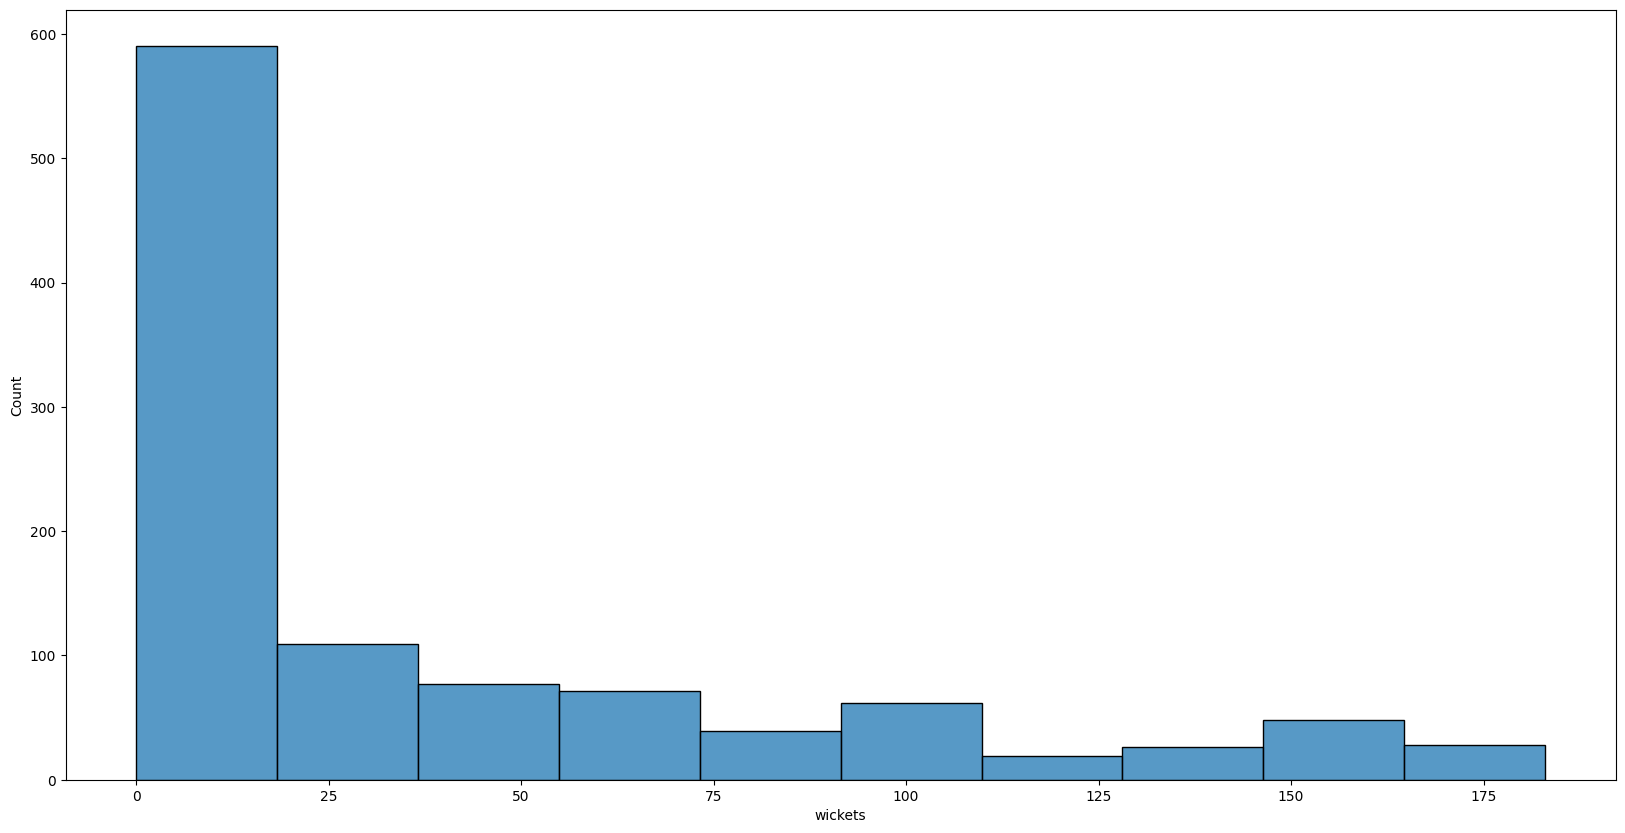

In [115]:
plt.figure(figsize=(20,10))
sns.histplot(matches['wickets'],bins=10)
plt.show()

In [ ]:
matches['bowling_avg'].fillna(matches['bowling_avg'].max(),inplace=True)

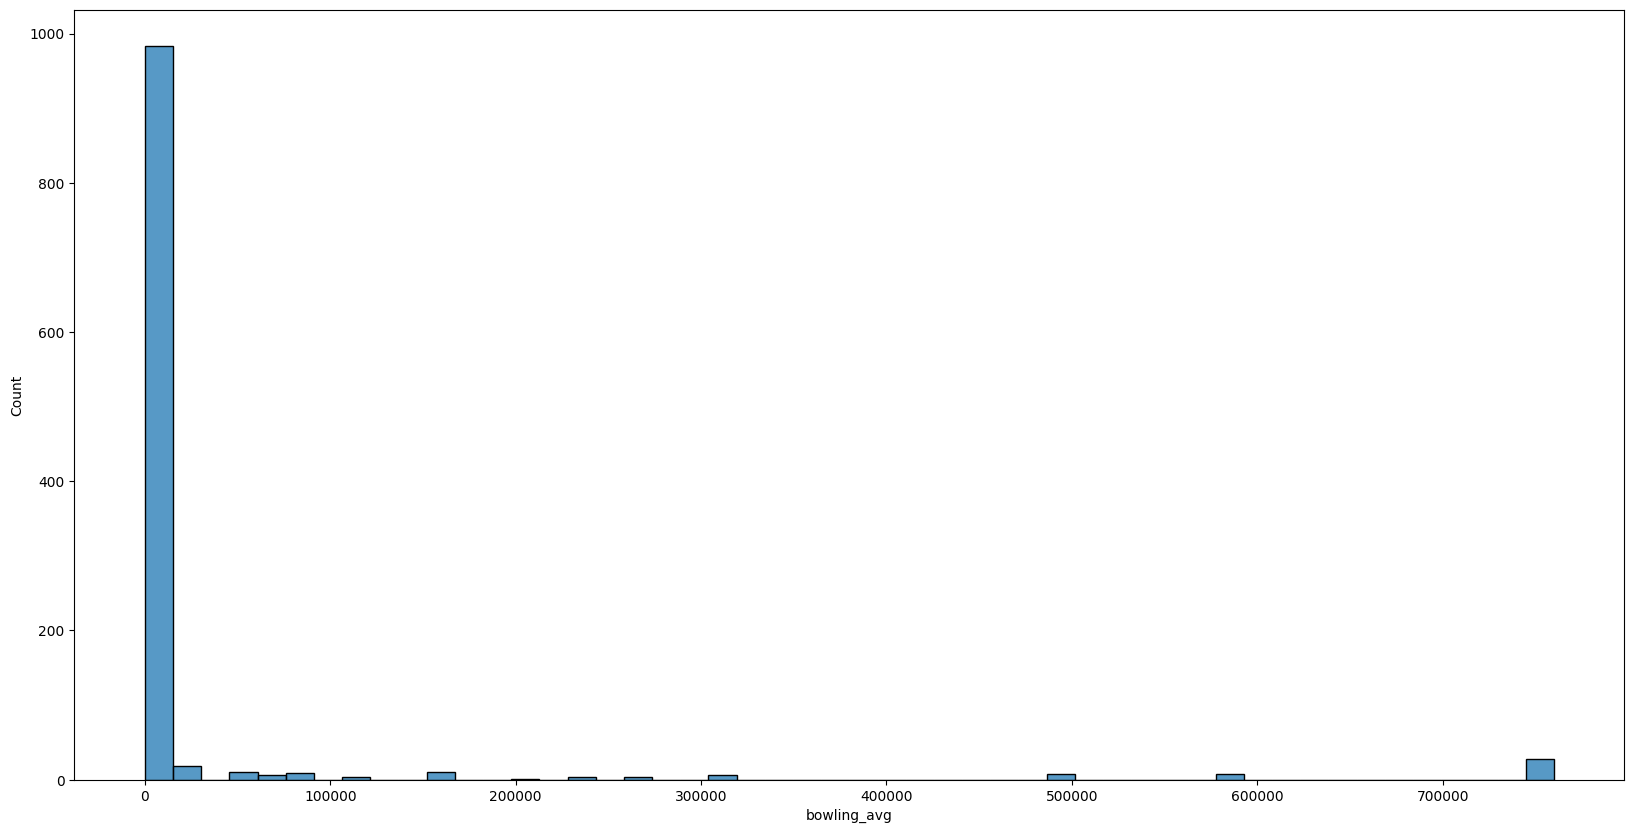

In [114]:
plt.figure(figsize=(20,10))
sns.histplot(matches['bowling_avg'],bins=50)
plt.show()

In [ ]:
matches.drop(columns=['player_of_match'],inplace=True)

In [121]:
matches.drop(columns=['date'],inplace=True)

In [122]:
matches.drop(columns=['result_margin'],inplace=True)

In [120]:
matches.sample(5)

,season,date,match_type,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,umpire1,umpire2,batting_avg,runs,bowling_avg,wickets
269,2012,2012-04-18,League,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,Kolkata Knight Riders,wickets,8.0,125.0,20.0,JD Cloete,RJ Tucker,27.93,4217.0,0.00,0.0
494,2015,2015-05-04,League,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kolkata Knight Riders,runs,35.0,168.0,20.0,AK Chaudhary,M Erasmus,1.34,177.0,29.93,135.0
195,2011,2011-04-20,League,Eden Gardens,Kolkata Knight Riders,Kochi Tuskers Kerala,Kolkata Knight Riders,field,Kochi Tuskers Kerala,runs,6.0,133.0,20.0,Aleem Dar,RB Tiffin,23.18,1808.0,0.00,0.0
287,2012,2012-05-01,League,Barabati Stadium,Deccan Chargers,Pune Warriors,Deccan Chargers,bat,Deccan Chargers,runs,13.0,187.0,20.0,Aleem Dar,AK Chaudhary,24.81,1687.0,0.00,0.0
99,2009,2009-05-14,League,Kingsmead,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,bat,Royal Challengers Bangalore,wickets,2.0,130.0,20.0,BR Doctrove,DJ Harper,18.83,1017.0,240000.00,0.0


In [80]:
matches[['batting_avg', 'bowling_avg', 'runs', 'wickets']] = matches[['batting_avg', 'bowling_avg', 'runs', 'wickets']].fillna(0)

In [34]:
columnTransformer=ColumnTransformer([('match_type',match_type_encoder,['match_type']),
                                    ['team',team_encoder,['team1','team2','toss_winner']],
                                    ['toss_decision',toss_decision_encoder,['toss_decision']],
                                    ['result',result_encoder,['result']],
                                    ['target_runs',target_runs_encoder,['target_runs']],
                                    ['target_overs',target_overs_encoder,['target_overs']],
                                    ['venues',venue_encoder,['venue']],
                                    ['umpires',umpire_encoder,['umpire1','umpire2']],
                                    ['runs',run_bins,['runs']],
                                    ['batting_avg',batting_avg_bins,['batting_avg']],
                                    ['bowling_avg',bowling_avg_bins,['bowling_avg']],
                                    ['wickets',wickets_bins,['wickets']]
                                    ],remainder='passthrough')

In [ ]:
matches.player_of_match.value_counts()

player_of_match
AB de Villiers       25
CH Gayle             22
RG Sharma            19
DA Warner            18
V Kohli              18
                     ..
NV Ojha               1
KV Sharma             1
Washington Sundar     1
PD Collingwood        1
Shahbaz Ahmed         1
Name: count, Length: 292, dtype: int64

In [7]:
players=pd.read_csv('IPL Player Stat.csv')

In [ ]:
players

,player,runs,boundaries,balls_faced,wickets,balls_bowled,runs_conceded,matches,batting_avg,batting_strike_rate,boundaries_percent,bowling_economy,bowling_avg,bowling_strike_rate,catches,stumpings
0,A Ashish Reddy,280,31,196,18.0,270.0,400.0,28,10.00,142.86,15.82,8.89,22.22,15.00,8.0,0.0
1,A Badoni,161,18,139,2.0,12.0,12.0,11,14.64,115.83,12.95,6.00,6.00,6.00,8.0,0.0
2,A Chandila,4,0,7,11.0,234.0,245.0,12,0.33,57.14,0.00,6.28,22.27,21.27,2.0,0.0
3,A Chopra,53,7,75,0.0,0.0,0.0,6,8.83,70.67,9.33,0.00,0.00,0.00,2.0,0.0
4,A Choudhary,25,2,20,5.0,108.0,144.0,5,5.00,125.00,10.00,8.00,28.80,21.60,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,Yash Dayal,0,0,1,11.0,205.0,296.0,9,0.00,0.00,0.00,8.66,26.91,18.64,1.0,0.0
601,Yashpal Singh,47,5,67,0.0,0.0,0.0,4,11.75,70.15,7.46,0.00,0.00,0.00,3.0,0.0
602,Younis Khan,3,0,7,0.0,0.0,0.0,1,3.00,42.86,0.00,0.00,0.00,0.00,1.0,0.0
603,Yuvraj Singh,2754,367,2207,36.0,882.0,1091.0,129,21.35,124.78,16.63,7.42,30.31,24.50,29.0,0.0


In [108]:
matches['batting_avg']=pd.merge(matches,players,how='left',left_on='player_of_match',right_on='player')['batting_avg']
matches['runs']=pd.merge(matches,players,how='left',left_on='player_of_match',right_on='player')['runs']
matches['bowling_avg']=pd.merge(matches,players,how='left',left_on='player_of_match',right_on='player')['bowling_avg']
matches['wickets']=pd.merge(matches,players,how='left',left_on='player_of_match',right_on='player')['wickets']

In [ ]:
matches.drop(columns=['player_of_match'],inplace=True)

In [ ]:
matches.drop(columns=['season'],inplace=True)

In [ ]:
matches.drop(columns=['date'],inplace=True)

In [70]:
matches

,season,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,umpire1,umpire2,batting_avg,runs,bowling_avg,wickets
0,2007/08,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,Asad Rauf,RE Koertzen,26.44,2882.0,0.00,0.0
1,2007/08,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,MR Benson,SL Shastri,34.09,1977.0,0.00,0.0
2,2007/08,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,Aleem Dar,GA Pratapkumar,8.85,177.0,19.70,27.0
3,2007/08,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,SJ Davis,DJ Harper,17.13,394.0,0.00,0.0
4,2007/08,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,BF Bowden,K Hariharan,21.67,1322.0,60.62,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2024,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,Nitin Menon,VK Sharma,18.53,667.0,31.14,7.0
1091,2024,2024-05-21,Qualifier,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,AK Chaudhary,R Pandit,3.69,96.0,21.32,34.0
1092,2024,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,KN Ananthapadmanabhan,MV Saidharshan Kumar,3.57,647.0,29.27,157.0
1093,2024,2024-05-24,Qualifier,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,Nitin Menon,VK Sharma,10.73,279.0,36.77,13.0


In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(matches['result_margin'],bins=120)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(matches['target_overs'],bins=3)
plt.show()

In [125]:
matches.to_csv('matches_cleaned.csv',index=False)

In [127]:
matches=pd.read_csv('matches_cleaned.csv')

In [17]:
X_trains, X_tests, y_trains, y_tests = train_test_split(matches.drop(columns=['winner']),matches['winner'],test_size=0.2,random_state=42)

In [27]:
X_trains['match_type'].value_counts()

match_type
League        832
Qualifier      19
Eliminator     15
Final          10
Name: count, dtype: int64

In [35]:
X_trains_transformed=columnTransformer.fit_transform(X_trains)

InvalidParameterError: The 'unknown_value' parameter of OrdinalEncoder must be an instance of 'int', an instance of 'float' or None. Got 'ignore' instead.